<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120-2.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.888275,36.112322,35.029919,1.466593,139.497109,137.796111,1.700998
1,0.0,1.0,49.766861,88.829794,70.092509,1.367376,220.056539,218.800213,1.256327
2,0.0,2.0,52.547182,59.469010,20.465852,0.512737,142.994782,142.419629,0.575153
3,0.0,3.0,92.068145,81.976246,21.256809,-1.724877,203.576324,205.214382,-1.638058
4,0.0,4.0,60.415871,77.788402,50.805270,-0.581415,198.428128,199.015380,-0.587252
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,50.911331,51.636932,57.437470,0.409166,170.394899,169.822052,0.572847
119996,999.0,116.0,49.443552,34.561754,38.508939,0.072730,132.586976,132.269116,0.317860
119997,999.0,117.0,42.333461,67.255998,79.095303,-0.438565,198.246196,198.557993,-0.311797
119998,999.0,118.0,35.422610,87.340612,22.288171,0.406434,155.457827,154.740349,0.717479


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    56.888275  36.112322  35.029919  ...  139.497109  137.796111  1.700998
      1.0    49.766861  88.829794  70.092509  ...  220.056539  218.800213  1.256327
      2.0    52.547182  59.469010  20.465852  ...  142.994782  142.419629  0.575153
      3.0    92.068145  81.976246  21.256809  ...  203.576324  205.214382 -1.638058
      4.0    60.415871  77.788402  50.805270  ...  198.428128  199.015380 -0.587252
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  50.911331  51.636932  57.437470  ...  170.394899  169.822052  0.572847
      116.0  49.443552  34.561754  38.508939  ...  132.586976  132.269116  0.317860
      117.0  42.333461  67.255998  79.095303  ...  198.246196  198.557993 -0.311797
      118.0  35.422610  87.340612  22.288171  ...  155.457827  154.740349  0.717479
      119.0  51.493670  80.718645  29.799264  ...  172.565764  171.798090  0.767674

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    56.888275  36.112322  35.029919  ...  139.497109  137.796111  1.700998
      1.0    49.766861  88.829794  70.092509  ...  220.056539  218.800213  1.256327
      2.0    52.547182  59.469010  20.465852  ...  142.994782  142.419629  0.575153
      3.0    92.068145  81.976246  21.256809  ...  203.576324  205.214382 -1.638058
      4.0    60.415871  77.788402  50.805270  ...  198.428128  199.015380 -0.587252
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  50.911331  51.636932  57.437470  ...  170.394899  169.822052  0.572847
      116.0  49.443552  34.561754  38.508939  ...  132.586976  132.269116  0.317860
      117.0  42.333461  67.255998  79.095303  ...  198.246196  198.557993 -0.311797
      118.0  35.422610  87.340612  22.288171  ...  155.457827  154.740349  0.717479
      119.0  51.493670  80.718645  29.799264  ...  172.565764  171.798090  0.767674

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.888275,36.112322,35.029919,1.466593,139.497109,137.796111,1.700998
1,0.0,1.0,49.766861,88.829794,70.092509,1.367376,220.056539,218.800213,1.256327
2,0.0,2.0,52.547182,59.469010,20.465852,0.512737,142.994782,142.419629,0.575153
3,0.0,3.0,92.068145,81.976246,21.256809,-1.724877,203.576324,205.214382,-1.638058
4,0.0,4.0,60.415871,77.788402,50.805270,-0.581415,198.428128,199.015380,-0.587252
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,50.911331,51.636932,57.437470,0.409166,170.394899,169.822052,0.572847
119996,999.0,116.0,49.443552,34.561754,38.508939,0.072730,132.586976,132.269116,0.317860
119997,999.0,117.0,42.333461,67.255998,79.095303,-0.438565,198.246196,198.557993,-0.311797
119998,999.0,118.0,35.422610,87.340612,22.288171,0.406434,155.457827,154.740349,0.717479


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    56.888275  36.112322  35.029919  ...  139.497109  137.796111  1.700998
      1.0    49.766861  88.829794  70.092509  ...  220.056539  218.800213  1.256327
      2.0    52.547182  59.469010  20.465852  ...  142.994782  142.419629  0.575153
      3.0    92.068145  81.976246  21.256809  ...  203.576324  205.214382 -1.638058
      4.0    60.415871  77.788402  50.805270  ...  198.428128  199.015380 -0.587252
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  50.911331  51.636932  57.437470  ...  170.394899  169.822052  0.572847
      116.0  49.443552  34.561754  38.508939  ...  132.586976  132.269116  0.317860
      117.0  42.333461  67.255998  79.095303  ...  198.246196  198.557993 -0.311797
      118.0  35.422610  87.340612  22.288171  ...  155.457827  154.740349  0.717479
      119.0  51.493670  80.718645  29.799264  ...  172.565764  171.798090  0.767674

[120000 rows x 7 columns]

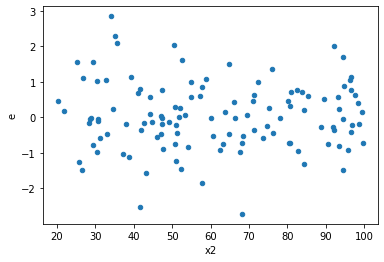

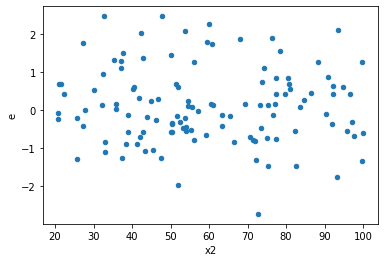

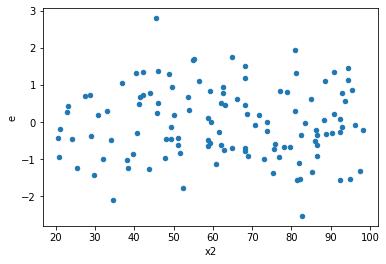

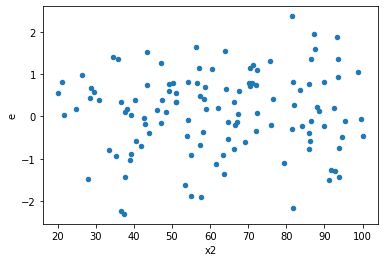

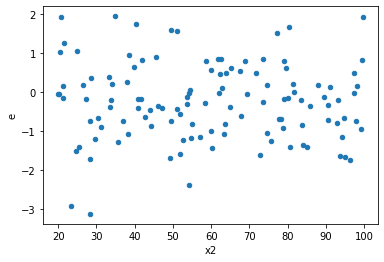

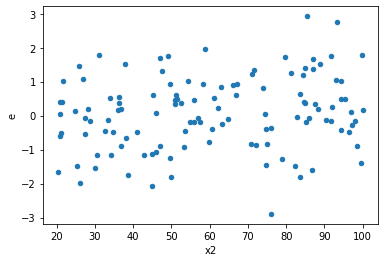

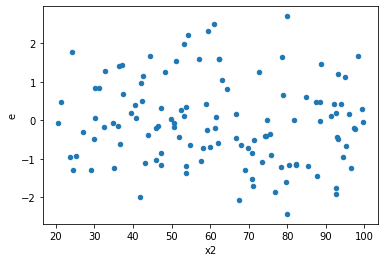

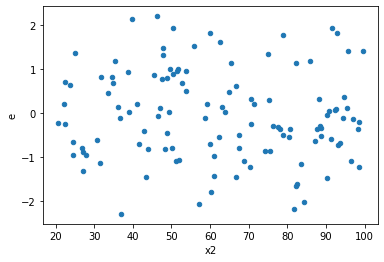

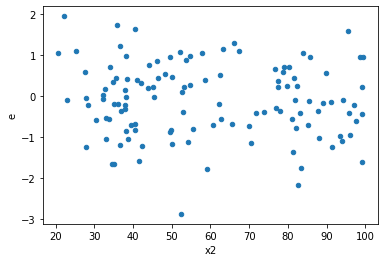

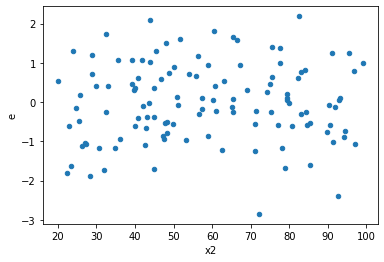

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,57.0,57.0,37.83458585428955,66.45933258292611,0.663764664110343,1.16595320320923,1.7565761876944448,0.03540805581162121,0.9822959720941894,0.017704027905810604,Reject005=0 : Heteroscedasticity
1.0,53.0,61.0,39.69121494114769,47.573043804362065,0.7488908479461829,0.7798859640059355,1.0413880289026847,0.8741909039245965,0.5629045480377017,0.43709545196229826,Reject005=1 : Homoscedasticity
2.0,49.0,65.0,32.224867858141735,68.40560736266924,0.6576503644518722,1.0523939594256806,1.6002332186082082,0.07617566952124499,0.9619121652393775,0.038087834760622497,Reject005=1 : Homoscedasticity
8.0,63.0,51.0,73.5955275555464,59.8742154583413,1.168182977072165,1.1740042246733589,1.0049831642092437,0.9926553651200298,0.5036723174399851,0.4963276825600149,Reject005=1 : Homoscedasticity
9.0,57.0,57.0,52.764086602780985,64.85522582755856,0.9256857298733506,1.137810979430852,1.2291547149446969,0.43847276972734206,0.780763615136329,0.21923638486367103,Reject005=1 : Homoscedasticity
10.0,61.0,53.0,54.87454916164927,50.445792329260556,0.8995827731417914,0.9518074024388784,1.0580542790016894,0.8374264396056852,0.5812867801971574,0.4187132198028426,Reject005=1 : Homoscedasticity
14.0,54.0,60.0,41.29234973580171,69.4296329730155,0.7646731432555872,1.1571605495502584,1.5132747367373993,0.1188469791788842,0.9405765104105579,0.0594234895894421,Reject005=1 : Homoscedasticity
15.0,62.0,52.0,58.13300870078776,62.58423206265465,0.937629172593351,1.20354292428182,1.2836022592524388,0.3563399512049388,0.8218300243975306,0.1781699756024694,Reject005=1 : Homoscedasticity
16.0,51.0,63.0,57.12622259300846,71.68073430822427,1.1201220116276167,1.1377894334638774,1.015772765513811,0.945883941813229,0.5270580290933855,0.4729419709066145,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,57.0,57.0,37.83458585428955,66.45933258292611,0.663764664110343,1.16595320320923,1.7565761876944448,0.03540805581162121,Reject005=0 : Heteroscedasticity
1.0,53.0,61.0,39.69121494114769,47.573043804362065,0.7488908479461829,0.7798859640059355,1.0413880289026847,0.8741909039245965,Reject005=1 : Homoscedasticity
2.0,49.0,65.0,32.224867858141735,68.40560736266924,0.6576503644518722,1.0523939594256806,1.6002332186082082,0.07617566952124499,Reject005=1 : Homoscedasticity
3.0,53.0,61.0,53.27183851954841,53.83795278772888,1.0051290286707246,0.8825893899627686,0.8780856634197365,0.6310221916072747,Reject005=1 : Homoscedasticity
4.0,60.0,54.0,57.11736328384328,38.01013730727617,0.9519560547307214,0.7038914316162254,0.7394158880740921,0.25487658779281785,Reject005=1 : Homoscedasticity
5.0,67.0,47.0,84.2973339245936,47.02823315098184,1.2581691630536358,1.0006007053400392,0.7952831262463421,0.38536675627586364,Reject005=1 : Homoscedasticity
6.0,54.0,60.0,44.31172158514445,46.21861560646688,0.8205874367619342,0.7703102601077813,0.9387302627340379,0.8161612215111446,Reject005=1 : Homoscedasticity
7.0,54.0,60.0,60.91639732680827,51.73680074864229,1.1280814319779309,0.8622800124773715,0.7643774536431167,0.31734303255776525,Reject005=1 : Homoscedasticity
8.0,63.0,51.0,73.5955275555464,59.8742154583413,1.168182977072165,1.1740042246733589,1.0049831642092437,0.9926553651200298,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      939
Reject005=0 : Heteroscedasticity     61
Name: Result_test, dtype: int64